In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten , Input, BatchNormalization, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model as M

In [5]:
X_train_datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.8)
X_test = ImageDataGenerator(rescale=1./255)

X_train = X_train_datagen.flow_from_directory(
        'C:/Users/ghass/OneDrive/Bureau/base/base/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

X_test = X_train_datagen.flow_from_directory(
        'C:/Users/ghass/OneDrive/Bureau/base/base/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
subset = 'validation')

Found 27807 images belonging to 6 classes.
Found 5607 images belonging to 6 classes.


In [7]:
#Input Layer
inp=Input(shape=(48,48,1))

#Convolution Layer
x=Conv2D(filters=32 , kernel_size =(3,3) , activation='relu' , padding='same' )(inp)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Conv2D(filters=64 , kernel_size =(3,3) , activation='relu' , padding='same' )(x)
x=MaxPooling2D(pool_size=(2,2))(x)
# x = Dropout(0.25)(x)
x=Conv2D(filters=128 , kernel_size =(3,3) , activation='relu' , padding='same' )(x)
x=MaxPooling2D(pool_size=(2,2))(x)
# x = Dropout(0.25)(x)


x=Flatten()(x)

#hidden layer 
x=Dense(units=1024 , activation='relu')(x)
#Output Layer
out=Dense(units=6, activation='softmax')(x)
Model=M(inputs=inp , outputs=out)
# for i in range(1,10):
#     Model.layers[i].trainable = False 


cv2.ocl.setUseOpenCL(False)
Model.summary()
Model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)        

In [9]:
history = Model.fit(
              X_train,
              epochs = 10,
              batch_size = 64,
              validation_data = X_test)
print("Best accuracy:", np.max(history.history["val_accuracy"])) 

Epoch 1/10
435/435 [==============================] - 75s 171ms/step - loss: 1.4684 - accuracy: 0.4203 - val_loss: 1.3255 - val_accuracy: 0.4887
Epoch 2/10
435/435 [==============================] - 46s 105ms/step - loss: 1.2400 - accuracy: 0.5167 - val_loss: 1.2196 - val_accuracy: 0.5295
Epoch 3/10
435/435 [==============================] - 48s 110ms/step - loss: 1.1193 - accuracy: 0.5688 - val_loss: 1.1630 - val_accuracy: 0.5495
Epoch 4/10
435/435 [==============================] - 46s 105ms/step - loss: 1.0111 - accuracy: 0.6177 - val_loss: 1.1217 - val_accuracy: 0.5680
Epoch 5/10
435/435 [==============================] - 45s 104ms/step - loss: 0.9013 - accuracy: 0.6632 - val_loss: 1.1438 - val_accuracy: 0.5671
Epoch 6/10
435/435 [==============================] - 45s 104ms/step - loss: 0.7668 - accuracy: 0.7144 - val_loss: 1.1979 - val_accuracy: 0.5664
Epoch 7/10
435/435 [==============================] - 45s 104ms/step - loss: 0.6107 - accuracy: 0.7771 - val_loss: 1.3252 - val_ac

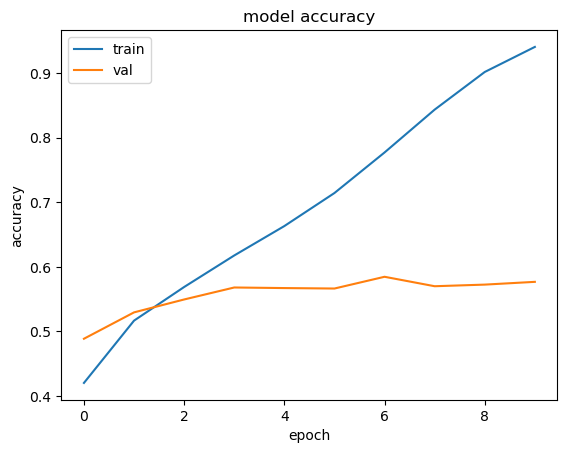

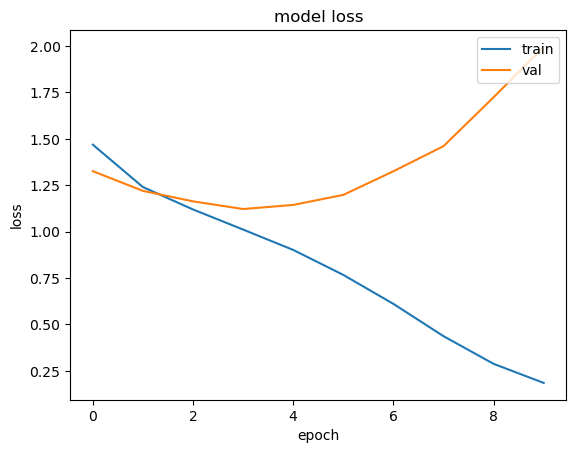

In [10]:
# Accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [11]:

emotion_dict = {0: "Angry", 1: "Fearful", 2: "Happy", 3: "Neutral", 4: "Sad", 5: "Surprised"}
cap = cv2.VideoCapture(0)
# Check if the camera is opened correctly
if not cap.isOpened():
    print("Error: Unable to access the camera. Please check your camera connection or camera index.")
    cap.release()
    cv2.destroyAllWindows()
    exit()

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()

    # Check if the frame is valid
    if not ret:
        print("Error: Unable to read frame from the camera.")
        break
    # Flip the frame horizontally (change the second argument to 0 for vertical flip)
    frame = cv2.flip(frame, 1)
    frame = cv2.resize(frame, (1280, 740))
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on the camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = Model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows() 